In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import alibi
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam


<Axes: >

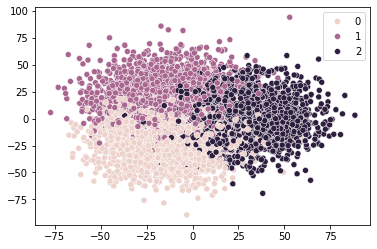

In [37]:
X, y = make_blobs(centers=3, cluster_std=18, n_features=20, n_samples=10000)
X_train, y_train = X[:8000], y[:8000]
X_test, y_test = X[8000:], y[8000:]

pca = PCA(n_components=2)
embed_X = pca.fit_transform(X_train)
sns.scatterplot(x=embed_X[:, 0], y=embed_X[:, 1], hue=y_train)


0.5755
Epoch 1/20
500/500 [==============================] - 2s 3ms/step - loss: -0.1423 - val_loss: -0.2786
Epoch 2/20
500/500 [==============================] - 1s 2ms/step - loss: -0.2993 - val_loss: -0.3962
Epoch 3/20
500/500 [==============================] - 1s 2ms/step - loss: -0.3873 - val_loss: -0.4629
Epoch 4/20
500/500 [==============================] - 1s 2ms/step - loss: -0.4252 - val_loss: -0.5024
Epoch 5/20
500/500 [==============================] - 1s 2ms/step - loss: -0.4660 - val_loss: -0.5377
Epoch 6/20
500/500 [==============================] - 1s 2ms/step - loss: -0.4980 - val_loss: -0.5662
Epoch 7/20
500/500 [==============================] - 1s 2ms/step - loss: -0.5192 - val_loss: -0.5915
Epoch 8/20
500/500 [==============================] - 1s 3ms/step - loss: -0.5322 - val_loss: -0.5913
Epoch 9/20
500/500 [==============================] - 1s 2ms/step - loss: -0.5510 - val_loss: -0.6286
Epoch 10/20
500/500 [==============================] - 1s 2ms/step - loss: 

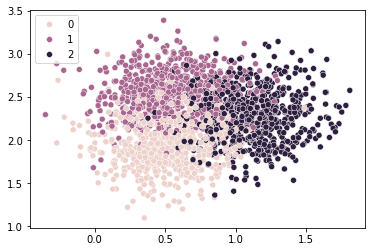

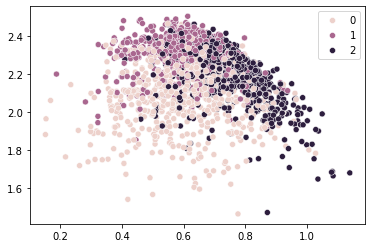

In [46]:
model = RandomForestClassifier(n_estimators=1)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

# Load and preprocess the dataset
# X_train = X_train.astype('float32') / 255.
# X_test = X_test.astype('float32') / 255.
# X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
# X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

# Define the size of the encoding

X_train = X_train / np.max(X_train, axis=0).reshape(1, -1)
X_test = X_test / np.max(X_test, axis=0).reshape(1, -1)
encoding_dim = 8

# Define the input placeholder
input_img = Input(shape=(20,))

# Define the encoder
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Define the decoder
decoded = Dense(20, activation='relu')(encoded)

# Combine the encoder and decoder into the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Train the model
autoencoder.fit(X_train, X_train,
                epochs=20,
                batch_size=16,
                shuffle=True,
                validation_data=(X_test, X_test))

# Evaluate the model
decoded_imgs = autoencoder.predict(X_test)

print(autoencoder.evaluate(X_test, X_test))
print(X_test.shape,decoded_imgs.shape)

embed_X = pca.transform(X_test)
sns.scatterplot(x=embed_X[:, 0], y=embed_X[:, 1], hue=y_test)
plt.show()
embed_X = pca.transform(decoded_imgs)
sns.scatterplot(x=embed_X[:, 0], y=embed_X[:, 1], hue=y_test)
plt.show()

In [39]:
shape = (1,) + X.shape[1:]
cf = alibi.explainers.CounterfactualProto(model, shape, kappa=0., beta=.1, gamma=100., theta=100.,
                                            ae_model=ae, enc_model=enc, max_iterations=500,
                                            feature_range=(-.5, .5), c_init=1., c_steps=5,
                                            learning_rate_init=1e-2, clip=(-1000., 1000.), write_dir='./cf')

NameError: name 'ae' is not defined